# Lab 6

For this lab, I needed to use the terminal to both get the reads file and also use bow tie and sam tools to manipulate it into a pileup file.  I used PuTTy to login to the host bioe131.com using my previous login information from bio.nixt.org.

**Align the reads to the human genome:**
In order to do this, I used the human genome as the database and the illumina reads fastq as the input reads.  The unaligned fastq file would contains all the reads that could not be matched up to the genome, which should be most of them.  I used the terminal command below:

bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S humanoutput.sam --un humanunaligned.fastq

**Output:**
1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate

8.57% of my sequencing library cam from contaminating human DNA.


**Align the reads to the S. ineidensis reference genome:**
In order to do this, I used the S.oneidensis genome as the database and the illumina reads fastq as the input reads.  The unaligned fastq file would contains all the reads that could not be matched up to the genome.  These would be poor quality reads since they all should align.  I used the terminal command below:

bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U /data/lab6/illumina_reads.fastq -S SOoutput.sam --un SOunaligned.fastq

**Output:**
1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    395895 (35.20%) aligned 0 times
    687571 (61.13%) aligned exactly 1 time
    41248 (3.67%) aligned >1 times
64.80% overall alignment rate

35.20% of reads didn't align to the genome.  If I use the parameter very-sensitive, this percentage goes up. 

**Generating a coverage plot:**
To generate a coverage plot, I need to use Sam tools to sort, index, and use depth to generate a file containing depth of coverage at each position.

I used the terminal commands below:
<img src="files/Lab6 terminal samtools.png">

Using this pileup file, I can plot results in a scatterplot and histogram.

In order to minimize computing time, I found the number of lines in the tab file using terminals commands:
<img src="files/Terminal line count.png">


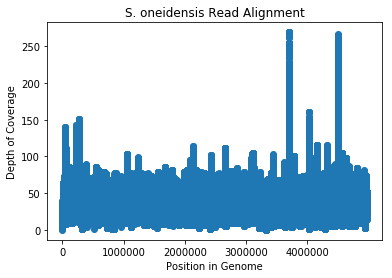

Stored 'DepthList' (list)


In [3]:
#<img src="files/Lab6 terminal bowtie.png">
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal, rand

oneidensis = open('SOpileup.tab')
lineCount = 4969711  #As determined via terminal commands
PosList = []
DepthList = []

for x in range(lineCount):
    a = oneidensis.readline()
    PosList.append(int(a.split()[1]))
    DepthList.append(int(a.split()[2]))
len(PosList)

plt.scatter(PosList, DepthList)
plt.title("S. oneidensis Read Alignment")
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.xticks(np.arange(0, max(PosList), 1000000))
plt.show()

%store DepthList

In [5]:
print(min(DepthList))
print(max(DepthList))
print(sum(DepthList)/4969711)

0
269
36


The min, max, and mean of this distribution are 0, 269, and 36, respectively.

Text(0.5,1,'S. oneidensis Depth of Coverage Distribution')

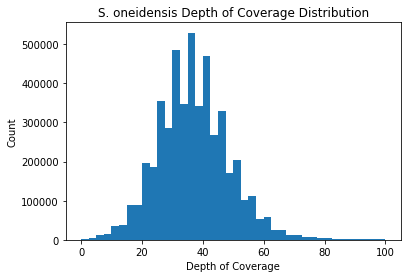

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal, rand

plt.hist(DepthList, range = (0,100), bins = 40)
plt.ylabel("Count")
plt.xlabel("Depth of Coverage")
plt.title("S. oneidensis Depth of Coverage Distribution")